In [1]:
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.patches import Arc as Arc_patch

In [6]:
from sympy.geometry import *
from sympy import *
from sympy.abc import t

In [24]:
s1 = Segment((0,0),(1,1))
s2 = Segment((0,-1),(1,0))

In [25]:
intersection(s1,s2)

[]

In [21]:
C2 = Curve((0.75*cos(t),0.2+0.75*sin(t)),(t,0,2))

In [68]:
C1 = Circle(Point(0,0),0.75)

In [45]:
x,y = symbols("x y")

In [53]:
exp = C1.equation()
exp.subs([(x,0),(y,0)])

x**2 + y**2 - 9/16

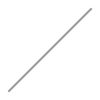

In [26]:
s1

In [60]:
C1.center

Point2D(0, 0)

In [4]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y,x) if y>=0 else 2*np.pi + np.arctan2(y,x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [13]:
cart2pol(-1,-1)

(1.4142135623730951, 3.9269908169872414)

In [22]:
class Arc:
    def __init__(self,r,theta1,theta2,origin=(0,0)):
        x,y = origin
        self.x = x
        self.y = y
        self.r = r
        self.theta1 = theta1
        self.theta2 = theta2
        self.endpoints = [Point(x+r*np.cos(theta1),y+r*np.sin(theta1)),Point(x+r*np.cos(theta2),y+r*np.sin(theta2))]
        self.circle = Circle(Point(x,y),r)  
        
    def encloses(self,point):
        xp,yp = float(point.x),float(point.y)
        theta = np.arctan2(yp,xp) if yp>=0 else 2*np.pi + np.arctan2(yp,xp)
        if (theta>=self.theta1 and theta<=self.theta2) or \
           (theta>=self.theta2 and theta<=self.theta1):
            return True
        else:
            return False
    
    def draw(self,ax,color):
        ax.add_patch(Arc_patch((self.x, self.y), 2*self.r,2*self.r, theta1=np.rad2deg(self.theta1), theta2=np.rad2deg(self.theta2), linewidth=1, color=color))
        
        
    
    

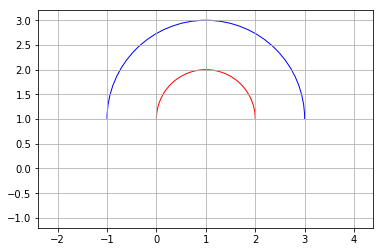

In [24]:
arc1 = Arc(1,0,3.14,(1,1))
arc2 = Arc(2,0,3.14,(1,1))
fig,ax = plt.subplots() 
arc1.draw(ax,'red')
arc2.draw(ax,'blue')
plt.axis('equal')
plt.grid()
plt.show()

In [56]:
Arc(3,0,np.pi/4).endpoints

[Point2D(3, 0),
 Point2D(53033008588991/25000000000000, 53033008588991/25000000000000)]

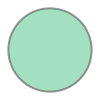

In [73]:
somept = Point(0.75,0.75)
C1

In [77]:
C1.encloses(somept)

False

3.9269908169872414

In [5]:
def arc_circle(gamma2,etaprime)->int:
    if len(intersection(etaprime,gamma2.circle))>0:
        [endpt1,endpt2] = gamma2.endpoints
        incl = [etaprime.encloses(endpt1),etaprime.encloses(endpt2)]
        thetas = (gamma2.theta1,gamma2.theta2) if gamma2.theta2>gamma2.theta1 else (gamma2.theta2,gamma2.theta1)
        x,y = float(etaprime.center.x),float(etaprime.center.y)
        center_angle = np.arctan2(y,x) if y>=0 else 2*np.pi + np.arctan2(y,x)

        if any(incl) and not all(incl):
            return 1
        elif (center_angle<=thetas[1] and center_angle>=thetas[0]):
            if not any(incl) and center_angle<=np.pi:
                return 2
            if all(incl) and center_angle>=np.pi:
                return 2
    else:
        return 0
    
    

In [29]:
gamma2x = Arc(1,np.pi/2,np.pi+0.5)

In [33]:
gamma2x.encloses(Point(0,67))

True

In [112]:
gamma2x.endpoints

[Point2D(612323399573677/10000000000000000000000000000000, 1),
 Point2D(-1, 24492935982947/200000000000000000000000000000)]

In [184]:
etaprimex = Circle(Point(-2,0),0.99)


In [193]:
print(arc_circle(gamma2x,etaprimex))

0hhaahhaa


In [ ]:
x = np.linspace()
plt.figure()
plt.plot(np.arctan(x))
plt.show

In [6]:
def arc_arc(gamma2,gamma2prime)->bool:
    """
    Returns True if gamma1 includes gamma2 partially or wholly
    Else returns False
    """
    eta,etaprime = gamma2.circle,gamma2prime.circle
    if len(intersection(eta,etaprime))==0:
        return False
    # Lemma 3.3 and 3.4
    if (arc_circle(gamma2,etaprime)==2 and arc_circle(gamma2prime,eta)==2) or \
       (arc_circle(gamma2,etaprime)==2 and arc_circle(gamma2prime,eta)==1) or \
       (arc_circle(gamma2,etaprime)==1 and arc_circle(gamma2prime,eta)==2):
        return True
    if (arc_circle(gamma2,etaprime)==1 and arc_circle(gamma2prime,eta)==1) and \
       (gamma2.theta1+gamma2.theta2>=0 and gamma2.theta1+gamma2.theta2<=2*np.pi) and \
       (gamma2prime.theta1+gamma2prime.theta2>=0 and gamma2prime.theta1+gamma2prime.theta2<=2*np.pi):
        return True
    else:
        return False     
        
    
    
    

In [12]:
def line_arc(gamma2,l1prime)->bool:
    """
    Returns True if gamma2 includes l1prime partially or wholly
    Else returns False
    """
    intersect = intersection(l1prime,gamma2.circle)
    if len(intersect)>0:
        if gamma2.encloses(intersect[0]):
            return True
        try:
            if gamma2.encloses(intersect[1]):
                return True
            else:
                return False
        except IndexError:
            return False
    return False

In [8]:
def line_line(l1,l2)->bool:
    """
    Returns True if l1 includes l2 partially or wholly
    Else returns False
    """
    intersect = intersection(l1,l2)
    if len(intersect)>0:
        return True
    else:
        return False

In [22]:
segment1 = Segment((3,-5),(3,5))
gammax = Arc(5,np.pi,3*np.pi/2)

In [23]:
line_arc(gammax,segment1)

False